In [ ]:
# Our project focuses on 

In [1]:
# test

In [27]:
library(tidyverse)

In [3]:
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv', "Data/data2014.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv', "Data/data2015.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv', "Data/data2016.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv', "Data/data2017.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv', "Data/data2018.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv', "Data/data2019.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv', "Data/data2020.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv', "Data/data2021.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv', "Data/data2022.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv', "Data/data2023.csv")

In [2]:
data2014<- read_csv("Data/data2014.csv")
data2015<- read_csv("Data/data2015.csv")
data2016<- read_csv("Data/data2016.csv")
data2017<- read_csv("Data/data2017.csv")
data2018<- read_csv("Data/data2018.csv")
data2019<- read_csv("Data/data2019.csv")
data2020<- read_csv("Data/data2020.csv")
data2021<- read_csv("Data/data2021.csv")
data2022<- read_csv("Data/data2022.csv")
data2023<- read_csv("Data/data2023.csv")

Rows: 2901 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2943 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2941 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tou

In [3]:
gigadata <- rbind(data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022, data2023) 

#   our chosen categories to determine victory or not will be 
#   winner_ioc and loser_ioc (country of origin) #
#   w_ace and l_ace (number of aces the winner/loser got)   #
#   winner_rank_points and loser_rank_points   #
#   

win_or_lose,average_aces
<chr>,<dbl>
loser_ace,5.444466
winner_ace,7.284860


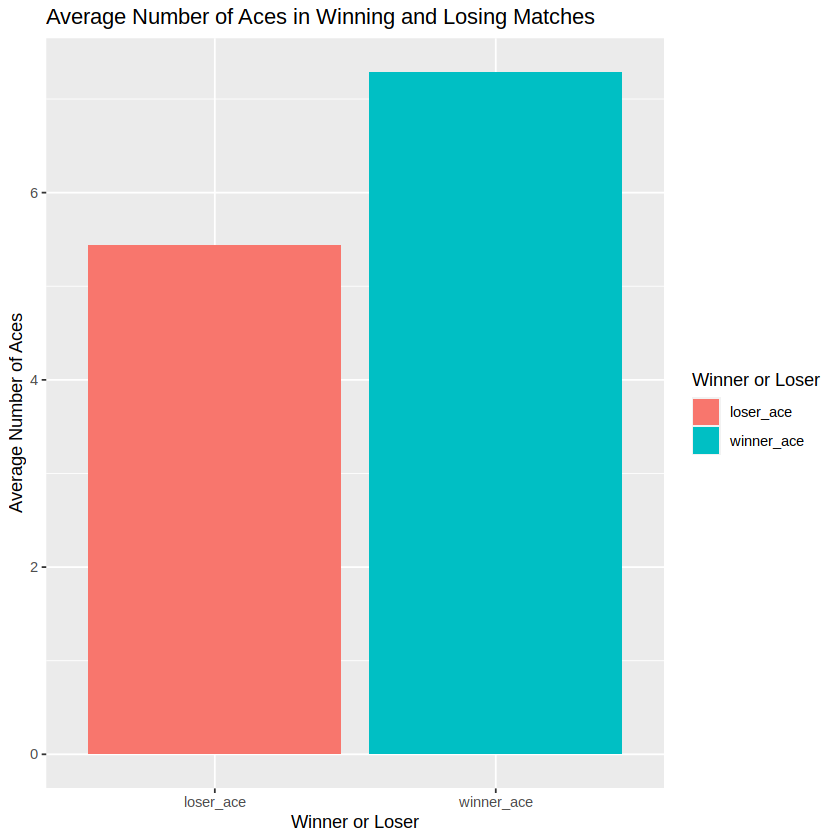

In [9]:
winner_ace_tbl<- summarize(gigadata, "winner_ace" = mean(w_ace, na.rm= TRUE))

loser_ace_tbl<- summarize(gigadata, "loser_ace" = mean(l_ace, na.rm= TRUE))


ace_tbl<- merge(loser_ace_tbl, winner_ace_tbl) |>
    pivot_longer(cols = loser_ace:winner_ace,
                names_to= "win_or_lose", 
                values_to = "average_aces")

ace_tbl

ace_bar<- ggplot(ace_tbl, aes(x= win_or_lose, y = average_aces, fill=win_or_lose)) + 
    geom_bar(stat="identity") +
    labs(x = "Winner or Loser", y = "Average Number of Aces", fill = "Winner or Loser") +
    ggtitle("Average Number of Aces in Winning and Losing Matches")

ace_bar

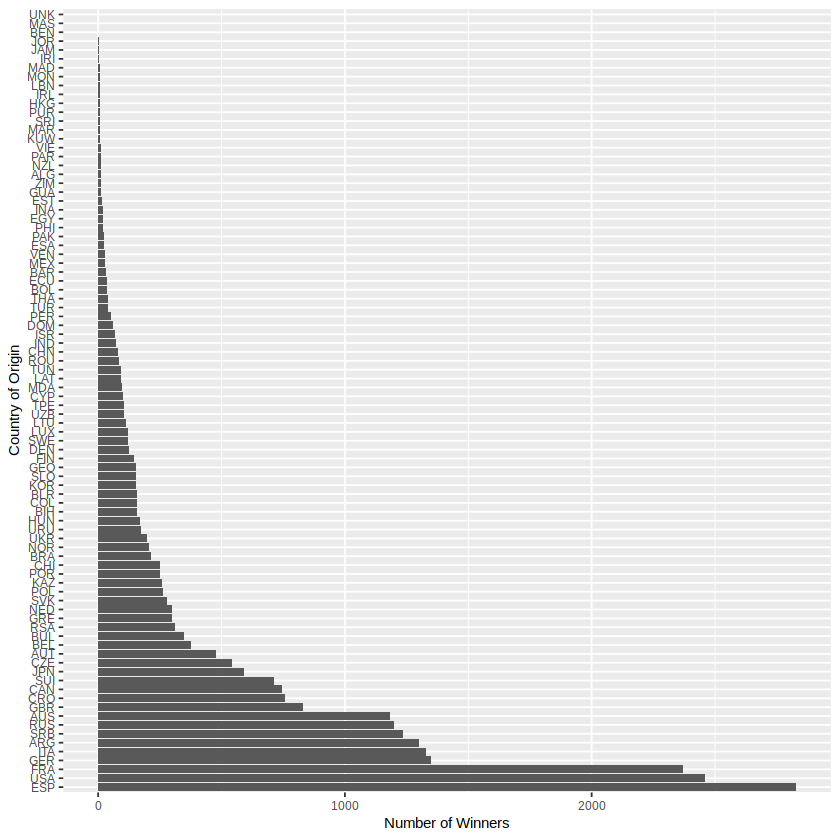

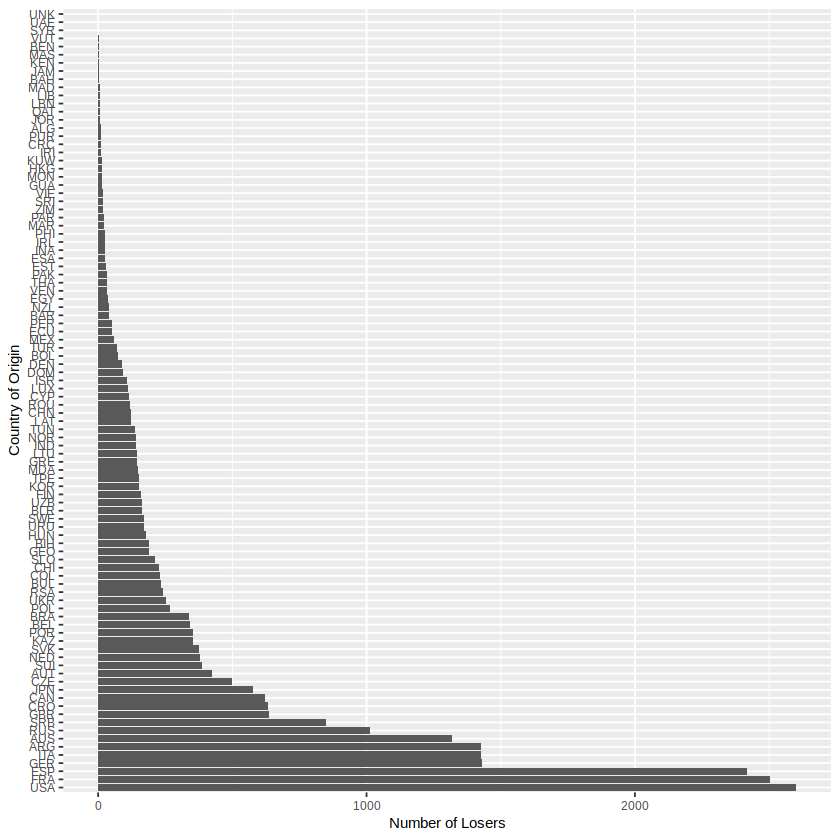

In [23]:
country_data<- select(gigadata, winner_ioc, loser_ioc)
country_winners<- country_data |>
    group_by(winner_ioc) |>
    summarize(counts=n()) |>
        ggplot(aes( y=fct_reorder(winner_ioc, counts, .desc=TRUE), x = counts)) + 
        geom_bar(stat="identity") +
        labs(x = "Number of Winners", y = "Country of Origin") + 
        theme(text = element_text(size = 9))

country_winners

country_losers<- country_data |>
    group_by(loser_ioc) |>
    summarize(counts=n()) |>
        ggplot(aes( y=fct_reorder(loser_ioc, counts, .desc=TRUE), x = counts)) + 
        geom_bar(stat="identity") +
        labs(x = "Number of Losers", y = "Country of Origin") + 
        theme(text = element_text(size = 9))

country_losers